# auto feature outbrain

## pipeline

1. RecDP will detect relation between multiple tables
2. RecDP then merge multiple tables as one table

## 1. Load Datasets

In [2]:
import pandas as pd
from utils import Timer
from pathlib import Path
import os, sys
pathlib = str(Path(os.path.abspath('')).parent.parent.parent.parent.resolve())
dir_path = f"{pathlib}/tests/data/outbrain/"

file_list = {
    'clicks': "clicks_train.csv",
    'documents_categories': "documents_categories.csv",
    'documents_entities': "documents_entities.csv",
    'documents_meta': "documents_meta.csv",
    'documents_topics': "documents_topics.csv",
    'events': "events.csv",
    'page_views': "page_views_sample.csv",
    'promoted_content': "promoted_content.csv"
}

train_data = dict((f_name, pd.read_csv(f"{dir_path}/{f_path}")) for f_name, f_path in file_list.items())
print("original data is ")
for k, v in train_data.items():
    print(k)
    display(v)

original data is 
clicks


,display_id,ad_id,clicked
0,16284020,81182,0
1,10851688,198590,0
2,4419817,44953,0
3,970696,1976,0
4,10118455,146534,0
...,...,...,...
8708,13049659,44146,0
8709,16742628,183739,0
8710,12521380,85217,1
8711,1823452,252531,0


documents_categories


,document_id,category_id,confidence_level
0,2352362,1708,0.780317
1,1594739,1702,0.920000
2,1805482,1909,0.920000
3,2918616,1909,0.070000
4,2612162,1702,0.372515
...,...,...,...
54810,932786,1408,0.920000
54811,120841,1513,0.920000
54812,1115090,1702,0.033258
54813,1072518,1904,0.056042


documents_entities


,document_id,entity_id,confidence_level
0,1165831,1ef5e52a1d88a24d106e3ac4d07c053d,0.371870
1,1050055,95f9914cccd5d27523c3f8fdb26ec974,0.429142
2,477528,a37b04d4455859fac64e1f2da229ca19,0.221397
3,1482012,ae25657b0f0f63a5036f8dffd77bd257,0.208224
4,624144,e3e4b172a6e3fe3a428fb8d0f18cc611,0.752378
...,...,...,...
55371,1758005,d38aa3238f050676fb217363b4793d5c,0.249378
55372,1787109,8fb694b25a41a6ffbb37870d7b15b9ef,0.863598
55373,176867,98bf11f29dd0160f58d870c0c7c6f07f,0.332959
55374,1057197,835581bade5c67504d6c0c9135706c67,0.241850


documents_meta


,document_id,source_id,publisher_id,publish_time
0,455174,842.0,38.0,2014-08-20 00:00:00
1,2757969,465.0,160.0,2016-06-24 07:00:00
2,394340,3.0,740.0,2016-07-21 00:00:00
3,1493309,1516.0,74.0,NaN
4,1485635,4194.0,723.0,2016-05-23 09:00:00
...,...,...,...,...
29988,1720729,127.0,84.0,2016-06-10 23:00:00
29989,49179,1907.0,284.0,NaN
29990,2509249,1929.0,265.0,2016-06-22 13:00:00
29991,1938596,3781.0,299.0,2016-06-15 13:00:00


documents_topics


,document_id,topic_id,confidence_level
0,1627006,249,0.124091
1,1776107,216,0.092571
2,1350395,176,0.053003
3,1485624,290,0.067220
4,588655,231,0.010365
...,...,...,...
113255,1047055,37,0.029292
113256,1687015,66,0.025900
113257,567346,231,0.010365
113258,1825982,20,0.052338


events


,display_id,uuid,document_id,timestamp,platform,geo_location
0,4967935,40dfeb57f000ee,1198481,320930355,1,US>AL>698
1,8666478,82056b07568174,2272350,584950772,1,ID>30
2,20999551,9c5d03fac43aaa,1381525,1184004787,2,NL>15
3,1241053,f88f4d99844dd4,1479631,74551999,1,US>CA>862
4,14537827,35d20b3563cdfc,2305575,957265831,2,US>WI>617
...,...,...,...,...,...,...
231196,2140178,a81a8be3c30997,859508,138016907,2,US>VA>573
231197,15648428,d01a974f0c8cdf,1526957,1039456560,2,US>GA>524
231198,22777619,fcbf55cd6c90a7,2945036,1277332641,1,US>TX>623
231199,3755812,3e0870229c1773,2038568,239683133,2,US>WI>669


page_views


,uuid,document_id,timestamp,platform,geo_location,traffic_source
0,7db77ca87e4258,1786253,40516871,1,US>CO>751,1
1,5938a1ec6e3af5,1482450,49732213,1,PE>15,3
2,ad8604581c44f8,1812224,48401515,1,US>LA>622,1
3,b1727224174818,379054,31169451,2,HK>00,2
4,7e031459822b2d,95516,42031607,2,US>AZ>753,2
...,...,...,...,...,...,...
99995,dc40b2f27face0,1833998,47418035,2,US>TX>625,1
99996,117a07a5cbb4f2,838069,47145780,2,US>NY>501,2
99997,1e8fd7477f588b,234,61175061,3,US>MN>613,1
99998,7da577646a63e7,25792,53891075,1,US>MA>506,1


promoted_content


,ad_id,document_id,campaign_id,advertiser_id
0,279845,1671112,27551,3074
1,28185,668644,4204,1352
2,17829,748438,2931,1636
3,193642,1484963,22788,3543
4,195462,866412,17909,1452
...,...,...,...,...
5591,40191,602076,5664,1890
5592,326105,1751141,29116,2176
5593,36590,899623,5286,823
5594,397970,1109919,30667,2874


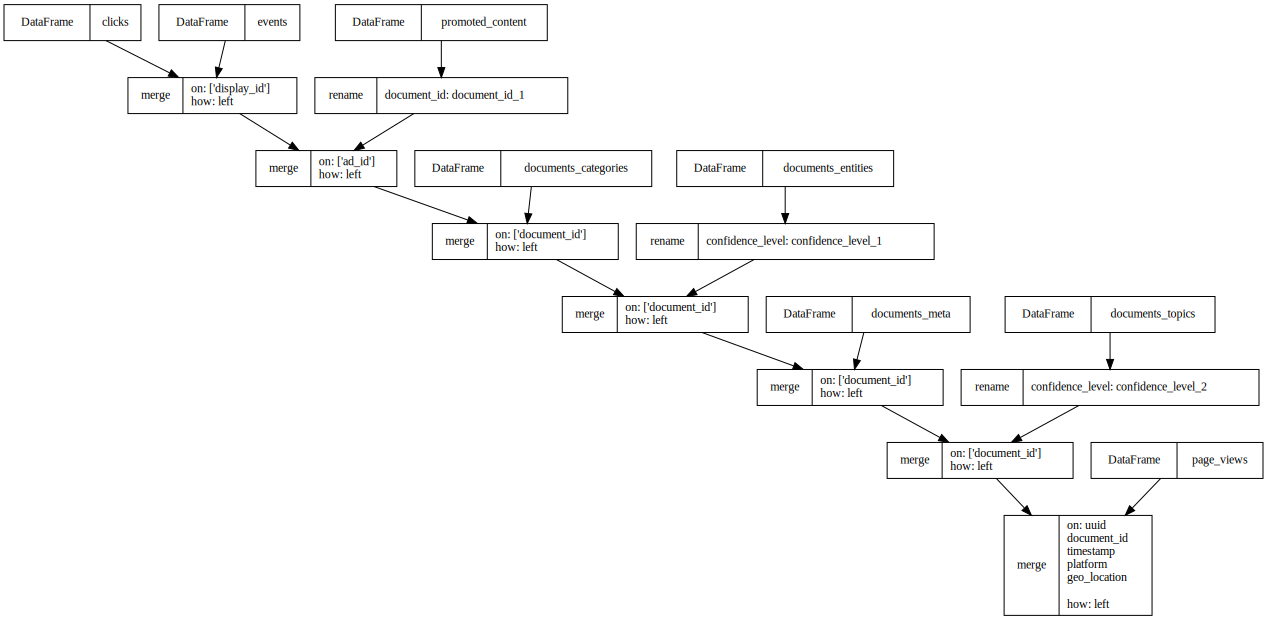

In [3]:
from pyrecdp.autofe import RelationalBuilder
pipeline = RelationalBuilder(dataset=train_data, label="clicked")
pipeline.plot()

In [4]:
print(f"pipeline to sequence chain: {pipeline.to_chain()}")
transformed_data = pipeline.fit_transform()

pipeline to sequence chain: [6, 4, 15, 3, 2, 12, 1, 7, 9, 5, 0, 8, 10, 11, 13, 14, 16, 17]
execute with pandas started ...
execute DataFrame started ...
  execute DataFrame took 9.196344763040543e-06 sec
execute DataFrame started ...
  execute DataFrame took 4.794914275407791e-06 sec
execute rename started ...
  execute rename took 0.004015302285552025 sec
execute DataFrame started ...
  execute DataFrame took 5.93205913901329e-06 sec
execute DataFrame started ...
  execute DataFrame took 3.9548613131046295e-06 sec
execute rename started ...
  execute rename took 0.0022245803847908974 sec
execute DataFrame started ...
  execute DataFrame took 4.318077117204666e-06 sec
execute DataFrame started ...
  execute DataFrame took 2.864282578229904e-06 sec
execute rename started ...
  execute rename took 0.0008452651090919971 sec
execute DataFrame started ...
  execute DataFrame took 3.3490359783172607e-06 sec
execute DataFrame started ...
  execute DataFrame took 2.798624336719513e-06 sec
exec

In [4]:
display(transformed_data)
transformed_data.dtypes

,display_id,ad_id,clicked,uuid,document_id,timestamp,platform,geo_location,document_id_1,campaign_id,...,category_id,confidence_level,entity_id,confidence_level_1,source_id,publisher_id,publish_time,topic_id,confidence_level_2,traffic_source
0,16284020,81182,0,618862ea2ac590,1539530,1086435821,1,US>MO>616,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10851688,198590,0,a98499ce31c3de,2486536,729470103,2,US>FL>528,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4419817,44953,0,94b00ca72b3540,2083212,291324383,1,US>WA>819,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,970696,1976,0,75c9832e5aec91,1850998,60102938,3,US>CA>803,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10118455,146534,0,728ff3b81e8392,2438225,675521512,1,US>CA>807,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,13049659,44146,0,ed3463420b9b81,1134799,859530371,1,US>UT>770,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8757,16742628,183739,0,1a2db9917657b1,2333455,1115232603,1,US>OH>535,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,12521380,85217,1,11bc810f94861f,822157,830184314,2,CA>BC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8759,1823452,252531,0,892d15018b5254,1499212,121197973,1,US>MI>513,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


display_id              int64
ad_id                   int64
clicked                 int64
uuid                   object
document_id             int64
timestamp               int64
platform                int64
geo_location           object
document_id_1         float64
campaign_id           float64
advertiser_id         float64
category_id           float64
confidence_level      float64
entity_id              object
confidence_level_1    float64
source_id             float64
publisher_id          float64
publish_time           object
topic_id              float64
confidence_level_2    float64
traffic_source        float64
dtype: object

In [5]:
pipeline.export()

{
    "0": {
        "children": null,
        "op": "DataFrame",
        "config": "'clicks'"
    },
    "1": {
        "children": null,
        "op": "DataFrame",
        "config": "'documents_categories'"
    },
    "2": {
        "children": null,
        "op": "DataFrame",
        "config": "'documents_entities'"
    },
    "3": {
        "children": null,
        "op": "DataFrame",
        "config": "'documents_meta'"
    },
    "4": {
        "children": null,
        "op": "DataFrame",
        "config": "'documents_topics'"
    },
    "5": {
        "children": null,
        "op": "DataFrame",
        "config": "'events'"
    },
    "6": {
        "children": null,
        "op": "DataFrame",
        "config": "'page_views'"
    },
    "7": {
        "children": null,
        "op": "DataFrame",
        "config": "'promoted_content'"
    },
    "8": {
        "children": [
            0,
            5
        ],
        "op": "merge",
        "config": {
            "on": [
    